[ 0.40184371  1.81446618  3.04048189 -3.10056774  1.45129253  3.92601393
  0.04264047 -1.07055799 -2.23709109  4.7808512   0.73326424 -3.67177878
  0.96260229  3.1086763  -2.33124867  2.57957453 -4.1482363   4.67527391
 -4.98884388 -1.44090684]
[-0.95713175 -1.10587448  0.90140665 -1.20545973  0.58975959  0.9077394
 -0.02767987 -2.03786365 -2.26658968  1.83985198  0.25774811 -3.04530982
 -0.53775823  2.27036063 -1.67409053  0.61640862 -2.64824245  0.69756246
 -2.79236688 -0.97399991]


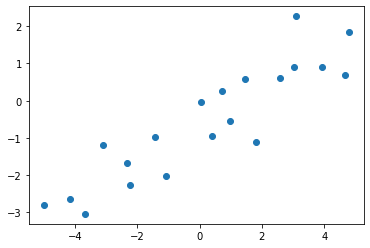

In [18]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt 

N = 20 
#random data on the x-axis in (-5,+5)
X = np.random.random(N) * 10 -5
print(X)
#a line plus some noise 
Y = 0.5 * X - 1 + np.random.randn(N)
print(Y)
plt.scatter(X,Y)

In [19]:
model = nn.Linear (1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

X = X.reshape(N,1)
Y = Y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32)) 

type(inputs)


torch.Tensor

In [22]:
n_epochs = 30 
losses = []
for it in range(n_epochs):
    
    #zero the parameters 
    optimizer.zero_grad()
    
    #Forward pass - to get model predictions 
    outputs = model(inputs)
    
    #keep the loss so that we can plot later
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    #backward and optimize 
    loss.backward()
    optimizer.step()  #does a one-step of gradient descent
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 0.4304
Epoch 2/30, Loss: 0.4304
Epoch 3/30, Loss: 0.4304
Epoch 4/30, Loss: 0.4304
Epoch 5/30, Loss: 0.4304
Epoch 6/30, Loss: 0.4304
Epoch 7/30, Loss: 0.4304
Epoch 8/30, Loss: 0.4304
Epoch 9/30, Loss: 0.4304
Epoch 10/30, Loss: 0.4304
Epoch 11/30, Loss: 0.4304
Epoch 12/30, Loss: 0.4304
Epoch 13/30, Loss: 0.4304
Epoch 14/30, Loss: 0.4304
Epoch 15/30, Loss: 0.4304
Epoch 16/30, Loss: 0.4304
Epoch 17/30, Loss: 0.4304
Epoch 18/30, Loss: 0.4304
Epoch 19/30, Loss: 0.4304
Epoch 20/30, Loss: 0.4304
Epoch 21/30, Loss: 0.4304
Epoch 22/30, Loss: 0.4304
Epoch 23/30, Loss: 0.4304
Epoch 24/30, Loss: 0.4304
Epoch 25/30, Loss: 0.4304
Epoch 26/30, Loss: 0.4304
Epoch 27/30, Loss: 0.4304
Epoch 28/30, Loss: 0.4304
Epoch 29/30, Loss: 0.4304
Epoch 30/30, Loss: 0.4304


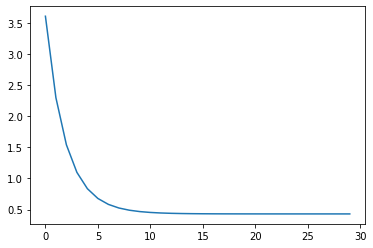

In [21]:
plt.plot(losses)

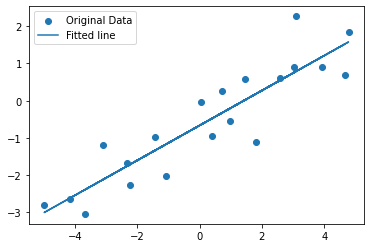

In [23]:
#Plot the graph 
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label='Original Data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()